# Part II - DonorsChoose - Data Processing
<b>You can find Part- I in the Exploratory Data Analysis Folder in GitHub</b>
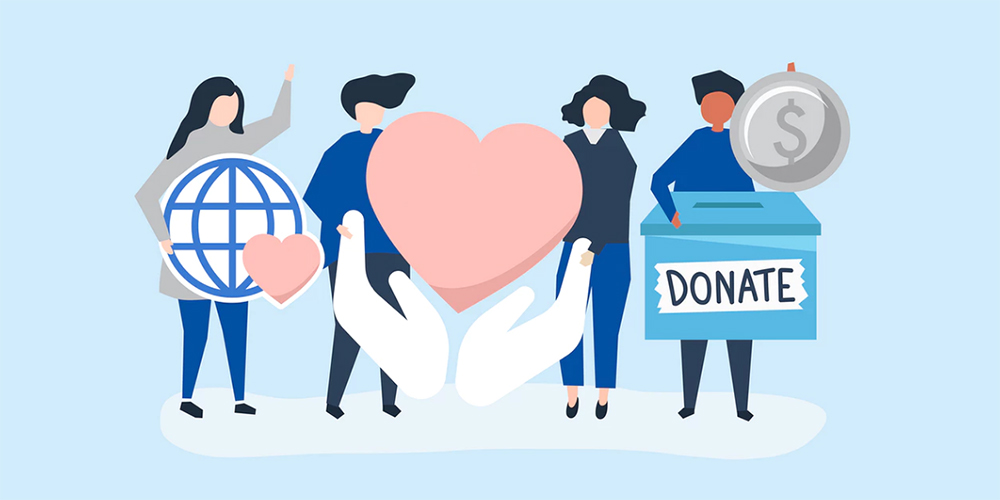

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import preprocessing
warnings.filterwarnings("ignore")

For our recommendation system we only need 3 Tables:
* Projects.csv
* Donors.csv
* Donations.csv

Link to the Dataset: https://www.kaggle.com/donorschoose/io 

## Projects

### Things to be done on Projects.csv during data processing
* Remove duplicate Project ID
* Only choose Project information of projects donated to by the donors in Oakland.
* Only select columns: **Project ID,Project Title, Project Subject Category Tree, Project Subject Subcategory Tree, Project Current Status,Project Cost** for recommendation.
* Remove rows with NaNs - for Project Titles that are NaNs: we can label it **Unnamed**
* Remove rows with **Project Subject Subcategory Tree** and **Project Subject Category Tree** missing. They happen to be the same set of rows

In [2]:
Projects_DF = pd.read_csv('Projects.csv')

In [3]:
Projects_DF.drop_duplicates(['Project ID'],inplace=True)
Projects_DF.reset_index(inplace = True,drop = True)
Projects_DF

,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date
0,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Did you know that 1-7 students in grades K-12 ...,"My students need 25 copies of ""Bullying in Sch...",Applied Learning,"Character Education, Early Development",Grades PreK-2,Technology,361.80,2013-01-01,2013-05-30,Fully Funded,2013-01-11
1,f9f4af7099061fb4bf44642a03e5c331,08b20f1e2125103ed7aa17e8d76c71d4,cca2d1d277fb4adb50147b49cdc3b156,3,Teacher-Led,Learning in Color!,"Help us have a fun, interactive listening cent...","Help us have a fun, interactive listening cent...","My students need a listening center, read alon...","Applied Learning, Literacy & Language","Early Development, Literacy",Grades PreK-2,Technology,512.85,2013-01-01,2013-05-31,Expired,NaN
2,afd99a01739ad5557b51b1ba0174e832,1287f5128b1f36bf8434e5705a7cc04d,6c5bd0d4f20547a001628aefd71de89e,1,Teacher-Led,Help Second Grade ESL Students Develop Languag...,Visiting or moving to a new place can be very ...,Visiting or moving to a new place can be very ...,My students need beginning vocabulary audio ca...,Literacy & Language,ESL,Grades PreK-2,Supplies,435.92,2013-01-01,2013-05-30,Fully Funded,2013-05-22
3,c614a38bb1a5e68e2ae6ad9d94bb2492,900fec9cd7a3188acbc90586a09584ef,8ed6f8181d092a8f4c008b18d18e54ad,40,Teacher-Led,Help Bilingual Students Strengthen Reading Com...,Students at our school are still working hard ...,Students at our school are still working hard ...,My students need one copy of each book in The ...,Literacy & Language,"ESL, Literacy",Grades 3-5,Books,161.26,2013-01-01,2013-05-31,Fully Funded,2013-02-06
4,ec82a697fab916c0db0cdad746338df9,3b200e7fe3e6dde3c169c02e5fb5ae86,893173d62775f8be7c30bf4220ad0c33,2,Teacher-Led,Help Us Make Each Minute Count!,"""Idle hands"" were something that Issac Watts s...","""Idle hands"" were something that Issac Watts s...","My students need items such as Velcro, two pou...",Special Needs,Special Needs,Grades 3-5,Supplies,264.19,2013-01-01,2013-05-30,Fully Funded,2013-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110010,9f666ce758b2b1ef81013c9ba44ad187,0b642ece7cc59dc44eebdde5bd76d550,8a1f2ff01d96fa4f6d958fea3b187ee0,1,Teacher-Led,Screen Printing 101,Most of the scholars had no idea that they wou...,Most of the scholars had no idea that they wou...,My students need the printer's Edge Aluminum S...,Music & The Arts,Visual Arts,Grades 9-12,Art Supplies,633.84,2018-05-01,2018-05-22,Fully Funded,2018-05-07
1110011,e793f983654503778ee5ca84c7949ba3,db672a68b83c7825123dfd757cd82fce,f1607b015231bdcc8ed9eedd0aa10c6a,3,Teacher-Led,Flexible Seating for Super Second Graders!,My students are super second graders!!! ...,My students are super second graders!!! Our sc...,My students need new flexible seating options ...,"Literacy & Language, Math & Science","Literature & Writing, Mathematics",Grades PreK-2,"Reading Nooks, Desks & Storage",626.24,2018-05-01,2018-08-30,Live,NaN
1110012,e4f265c55af985eb36b404dc3c7d4bfa,ca45c121a0e1c1450a76f083a37a6cc5,eb843a28beb426d697afa249ba0b6499,10,Teacher-Led,Growing Artists!,"I teach at a Title I school, and 76% of studen...","I teach at a Title I school, and 76% of studen...",My students need must have instruction across ...,"Literacy & Language, Music & The Arts","Literature & Writing, Visual Arts",Grades PreK-2,Art Supplies,193.13,2018-05-01,2018-09-01,Fully Funded,2018-05-03
1110013,09bec6536169086e7c5441eb703e292a,41c4a4fb5712361c2efb1b24a6f4830a,58bf90d0f324190e96efe0e83b12a5d3,2,Teacher

In [4]:
Projects_DF = Projects_DF[['Project ID','Project Title','Project Subject Category Tree','Project Subject Subcategory Tree','Project Cost','Project Current Status']]

In [5]:
Projects_DF

,Project ID,Project Title,Project Subject Category Tree,Project Subject Subcategory Tree,Project Cost,Project Current Status
0,7685f0265a19d7b52a470ee4bac883ba,Stand Up to Bullying: Together We Can!,Applied Learning,"Character Education, Early Development",361.80,Fully Funded
1,f9f4af7099061fb4bf44642a03e5c331,Learning in Color!,"Applied Learning, Literacy & Language","Early Development, Literacy",512.85,Expired
2,afd99a01739ad5557b51b1ba0174e832,Help Second Grade ESL Students Develop Languag...,Literacy & Language,ESL,435.92,Fully Funded
3,c614a38bb1a5e68e2ae6ad9d94bb2492,Help Bilingual Students Strengthen Reading Com...,Literacy & Language,"ESL, Literacy",161.26,Fully Funded
4,ec82a697fab916c0db0cdad746338df9,Help Us Make Each Minute Count!,Special Needs,Special Needs,264.19,Fully Funded
...,...,...,...,...,...,...
1110010,9f666ce758b2b1ef81013c9ba44ad187,Screen Printing 101,Music & The Arts,Visual Arts,633.84,Fully Funded
1110011,e793f983654503778ee5ca84c7949ba3,Flexible Seating for Super Second Graders!,"Literacy & Language, Math & Science","Literature & Writing, Mathematics",626.24,Live
1110012,e4f265c55af985eb36b404dc3c7d4bfa,Growing Artists!,"Literacy & Language, Music & The Arts","Literature & Writing, Visual Arts",193.13,Fully Funded
1110013,09bec6536169086e7c5441eb703e292a,TIME For Kids!,Literacy & Language,ESL,246.18,Live


In [6]:
Projects_DF.dropna(subset= ['Project Subject Subcategory Tree'],inplace = True)

# Donors

### Things to be done on Donors.csv during data processing
* Only choose Donors from the city of Oakland.
* Only select columns: **Donor ID,Donor City**. Merge this with **Donations.csv** to get donors of Oakland
* Remove rows with NaNs

In [7]:
Donors_DF = pd.read_csv('Donors.csv')

In [8]:
Donors_DF = Donors_DF[['Donor ID', 'Donor City']]

In [9]:
Donors_DF  = Donors_DF[Donors_DF['Donor City'] == 'Oakland']

# Donations

### Things to be done on Donations.csv during data processing
* Remove duplicate Donation ID
* Merge Donors_DF and Donations_DF to get donors of Oakland
* Merge Projects_DF and Donations_DF to get information of projects donated to by donaors of Oakland
* Remove rows with NaNs (there maybe some as merging)

In [10]:
Donations_DF = pd.read_csv('Donations.csv')

In [11]:
Donations_DF.drop_duplicates(['Donation ID'],inplace=True)
Donations_DF.reset_index(inplace = True,drop = True)

In [12]:
Donor_Donation_Oakland_DF = Donors_DF.merge(Donations_DF,on = ['Donor ID'], how = 'left')

In [13]:
Donor_Donation_Oakland_DF = Donor_Donation_Oakland_DF[['Donor ID','Project ID','Donation Amount','Donation Received Date']]

In [14]:
Donor_Donation_Oakland_DF.isnull().sum()

Donor ID                    0
Project ID                294
Donation Amount           294
Donation Received Date    294
dtype: int64

The 294 Donors in Oakland are ones who haven't donated to any project. Let's drop them! We cannot use content based filtering to recommend to them. We could however use *popularity based recommendation*

In [15]:
Donor_Donation_Oakland_DF.dropna(inplace = True)
Donor_Donation_Oakland_DF.reset_index(inplace = True, drop = True)

In [16]:
Projects_Donations_Oakland_DF = Donor_Donation_Oakland_DF.merge(Projects_DF, on = ['Project ID'], how ='left')

In [17]:
Projects_Donations_Oakland_DF['Event Strength'] = 1

In [18]:
Projects_Donations_Oakland_DF.head()

,Donor ID,Project ID,Donation Amount,Donation Received Date,Project Title,Project Subject Category Tree,Project Subject Subcategory Tree,Project Cost,Project Current Status,Event Strength
0,0005e94def8dbd5e0ca7a01437536f9a,c04935c54c6923eb5a3ad4a4eb0b0f92,25.0,2015-02-11 22:04:18,Helping the Band Purr: Journey for a Bass Clar...,Music & The Arts,Music,2468.29,Expired,1
1,0008b9b73b5eaeb5f96cbd673eca324b,c493dd3d1d62f9d4ac818c00a4e5cbcc,25.0,2016-08-13 01:41:48,Grab Those Greek Myths Round 2!,Literacy & Language,Literature & Writing,748.87,Fully Funded,1
2,0018044947d8f129fd6df4b9e1648bae,7ea57b6fb70d189edb64132d5ec6f86e,30.0,2017-05-18 12:10:39,Getting Graphic: Bridging The Language Gap Wit...,Literacy & Language,"ESL, Literacy",360.92,Fully Funded,1
3,0018044947d8f129fd6df4b9e1648bae,c5e81eacaea132404ec851372f543ee8,25.0,2017-07-17 14:02:15,Teach Me How To Wobble,Applied Learning,Other,590.73,Fully Funded,1
4,001866acfc2ca9ef789a17190082517a,55f9a00e3c33cb133d90193e26412705,5.0,2017-03-01 00:19:44,STEM Schools First CIF Boy's Volleyball Team N...,Health & Sports,"Health & Wellness, Team Sports",1170.54,Fully Funded,1


The 242 projects are ones that have no description. Let's drop them

In [19]:
Projects_Donations_Oakland_DF.dropna(inplace = True)
Projects_Donations_Oakland_DF.reset_index(inplace = True, drop = True)

In [20]:
f1 =open('Donations_Oakland.csv','w')
Projects_Donations_Oakland_DF[['Donor ID','Project ID','Event Strength']].to_csv(f1,index = False)
f1.close()

In [21]:
f1 =open('Projects_Oakland.csv','w')
Projects_Donations_Oakland_DF[['Project ID','Project Title','Project Subject Category Tree','Project Subject Subcategory Tree','Project Current Status']].to_csv(f1,index = False)
f1.close()

#### We are now ready to do some recommendations for the donors in Oakland!